In [5]:
# Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the CSV file into a DataFrame: df
MSFT = pd.read_csv('MSFT.csv',index_col='Date',parse_dates=True)
MSFT.head()

,Adj Close
Date,
2012-08-06,26.107651
2012-08-07,26.377876
2012-08-08,26.438896
2012-08-09,26.587088
2012-08-10,26.517351


In [6]:
# Convert the daily data to weekly data
MSFT = MSFT.resample(rule='W',how='last')

In [4]:
# Compute the percentage change of prices
returns = MSFT.pct_change()
returns.head()

,Adj Close
Date,
2012-08-12,NaN
2012-08-19,0.022508
2012-08-26,-0.011003
2012-09-02,0.008508
2012-09-09,0.004218


In [7]:
returns.index

DatetimeIndex(['2012-08-12', '2012-08-19', '2012-08-26', '2012-09-02',
               '2012-09-09', '2012-09-16', '2012-09-23', '2012-09-30',
               '2012-10-07', '2012-10-14',
               ...
               '2017-06-04', '2017-06-11', '2017-06-18', '2017-06-25',
               '2017-07-02', '2017-07-09', '2017-07-16', '2017-07-23',
               '2017-07-30', '2017-08-06'],
              dtype='datetime64[ns]', name='Date', length=261, freq='W-SUN')

In [8]:
returns =returns.dropna()

# confidence interval for  ACF

In [10]:
# Import the plot_acf module from statsmodels and sqrt from math
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt

In [11]:
# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

The autocorrelation of weekly MSFT returns is -0.16


In [12]:
# Find the number of observations by taking the length of the returns DataFrame
nobs = len(returns)

In [13]:
# Compute the approximate confidence interval
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

The approximate confidence interval is +/- 0.12


In [14]:
# Compute the acf array of returns
acf_array = acf(returns)
print(acf_array)

[ 1.         -0.15668395 -0.03379755  0.03056461  0.03699199 -0.06912154
  0.01526406 -0.092212    0.08713875 -0.06923249 -0.04994686  0.03385353
 -0.07630911 -0.11055492  0.07357434 -0.0380345   0.00509845 -0.00450528
 -0.02304186 -0.04249225 -0.01251482  0.03645871 -0.00185174  0.06583101
 -0.0337856   0.13908025 -0.02212358 -0.01247623 -0.09768778 -0.01633453
 -0.06819824  0.09572665 -0.07215814  0.00953152 -0.05575735  0.05944854
  0.04478064 -0.04443176 -0.08406624  0.10877777 -0.01089939]


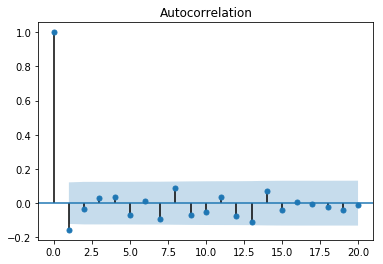

In [15]:
# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(returns, alpha=0.05,lags=20)
plt.show()

# Are returns a Random Walk?

In [16]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Run the ADF test on the returns series and print out the results
results = adfuller(returns["Adj Close"])
print(results)

(-18.785420729124045, 2.0238804729679003e-30, 0, 259, {'1%': -3.4558530692911504, '5%': -2.872764881778665, '10%': -2.572751643088207}, -1003.0062848819146)


In [17]:
# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

The p-value of the test on prices is: 2.0238804729679003e-30


# Can't Forecast White Noise

In [18]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Simulate white noise returns
returns1 = np.random.normal(loc=0.02, scale=0.05, size=1000 )

In [19]:
# Print out the mean and standard deviation of returns
mean = np.mean(returns1)
std = np.std(returns1)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))

The mean is 0.020 and the standard deviation is 0.050


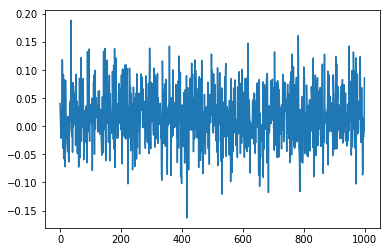

In [20]:
# Plot returns series
plt.plot(returns1)
plt.show()

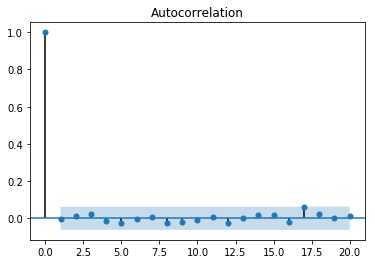

In [21]:
# Plot autocorrelation function of white noise returns
plot_acf(returns1, lags=20)
plt.show()

# Estimating and Forecasting with an AR and MA Model

In [22]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast interest rates using an AR(1) model
mod = ARMA(returns, order=(1,0))
res = mod.fit()
print(res.params)
BIC = res.bic
print(BIC)

const              0.004359
ar.L1.Adj Close   -0.156345
dtype: float64
-1060.1590850645703


In [23]:
# Fit the data to an MA(1) model
mod1 = ARMA(returns, order=(0,1))
res1 = mod1.fit()
print(res1.params)
BIC1 = res1.bic
print(BIC1)

const              0.004361
ma.L1.Adj Close   -0.169203
dtype: float64
-1060.7446055276855


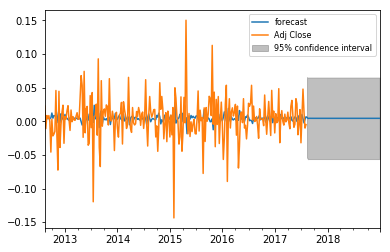

In [26]:
# Plot the original series and the forecasted series
res.plot_predict(start='2012-08-19', end= '2018-12-30')
plt.legend(fontsize=8)
plt.show()

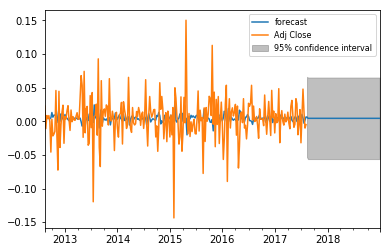

In [27]:
# Plot the original series and the forecasted series
res1.plot_predict(start='2012-08-19', end= '2018-12-30')
plt.legend(fontsize=8)
plt.show()

# Equivalence of AR(1) and MA(infinity)

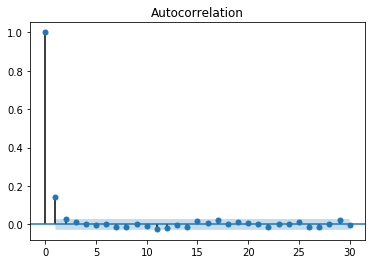

In [24]:
# import the modules for simulating data and plotting the ACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

# Build a list MA parameters
ma = [-0.15**i for i in range(30)]

# Simulate the MA(30) model
ar = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data =AR_object.generate_sample(nsample=5000)

# Plot the ACF
plot_acf(simulated_data, lags=30)
plt.show()